<a href="https://colab.research.google.com/github/jorgelizarazo94/incubation_rhythm/blob/main/Incubation_egg_nest_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  ####
import numpy as np ####
import xarray as xr  ####
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
import requests
from io import StringIO

url = 'https://github.com/jorgelizarazo94/incubation_rhythm/raw/c6dfa63358f474a4731291ff25c8628f8f434944/data/Conopophaga_ardesiaca_SI1_07_EGG_uidea.csv'
response = requests.get(url)
data = response.content.decode('utf-8')

df = pd.read_csv(StringIO(data))

df.head(20)

,#,Date-time,Nest,Egg,Ambient
0,1,9/18/2007 13:00,24.91,34.43,20.91
1,2,9/18/2007 13:01,25.09,34.85,20.91
2,3,9/18/2007 13:02,25.09,34.85,20.91
3,4,9/18/2007 13:03,25.09,34.85,20.91
4,5,9/18/2007 13:04,25.27,34.85,20.74
5,6,9/18/2007 13:05,25.27,34.43,20.74
6,7,9/18/2007 13:06,25.27,34.43,20.74
7,8,9/18/2007 13:07,25.27,34.85,20.74
8,9,9/18/2007 13:08,25.27,35.27,20.74
9,10,9/18/2007 13:09,25.27,35.27,20.74


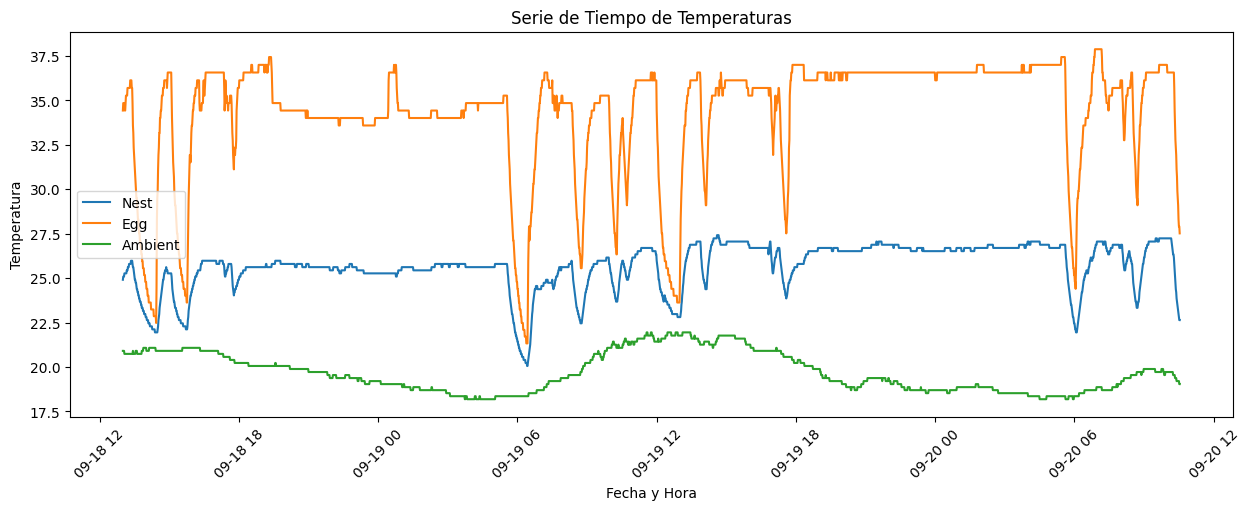

'\nDonde naranja es la temperatura del Huevo (el target), luego en azul la temperatura alrededor del huevo o al interior del nido, finalmente en verde la temperatura ambiental\n'

In [ ]:
# Convertir la columna 'Date Time, GMT-05:00' en formato de fecha y hora
df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 5))

# Graficar la serie de tiempo para 'Nest'
ax.plot(df['Date-time'], df['Nest'], label='Nest')

# Graficar la serie de tiempo para 'Egg'
ax.plot(df['Date-time'], df['Egg'], label='Egg')

# Graficar la serie de tiempo para 'Ambient'
ax.plot(df['Date-time'], df['Ambient'], label='Ambient')

# Configurar las etiquetas de los ejes
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura')
ax.set_title('Serie de Tiempo de Temperaturas')
ax.legend()

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

'''
Donde naranja es la temperatura del Huevo (el target), luego en azul la temperatura alrededor del huevo o al interior del nido, finalmente en verde la temperatura ambiental
'''


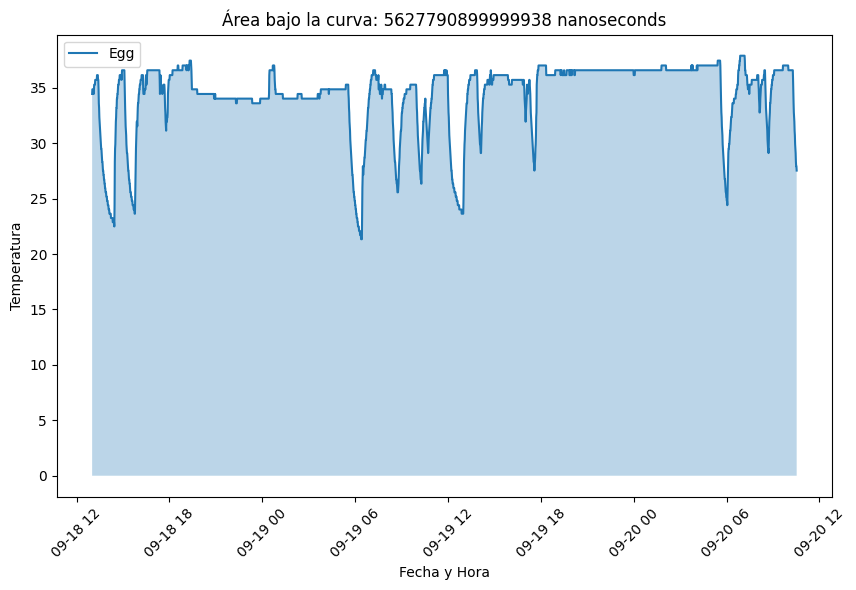

'\nAca el calculo base del area bajo la curva peroooooooooooo, tiene error porque debe incluirse desde la temperatura ambiental hasta la del huevo, entonces seria la diferencia.\n'

In [ ]:
df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la serie de tiempo para 'Egg'
ax.plot(df['Date-time'], df['Egg'], label='Egg')

# Calcular el área bajo la curva de 'Egg'
area_under_curve = np.trapz(df['Egg'], x=df['Date-time'].values)

# Rellenar el área bajo la curva de 'Egg'
ax.fill_between(df['Date-time'], df['Egg'], alpha=0.3)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura')
ax.set_title(f'Área bajo la curva: {area_under_curve}')

plt.xticks(rotation=45)
ax.legend()
plt.show()


'''
Aca el calculo base del area bajo la curva peroooooooooooo, tiene error porque debe incluirse desde la temperatura ambiental hasta la del huevo, entonces seria la diferencia.
'''

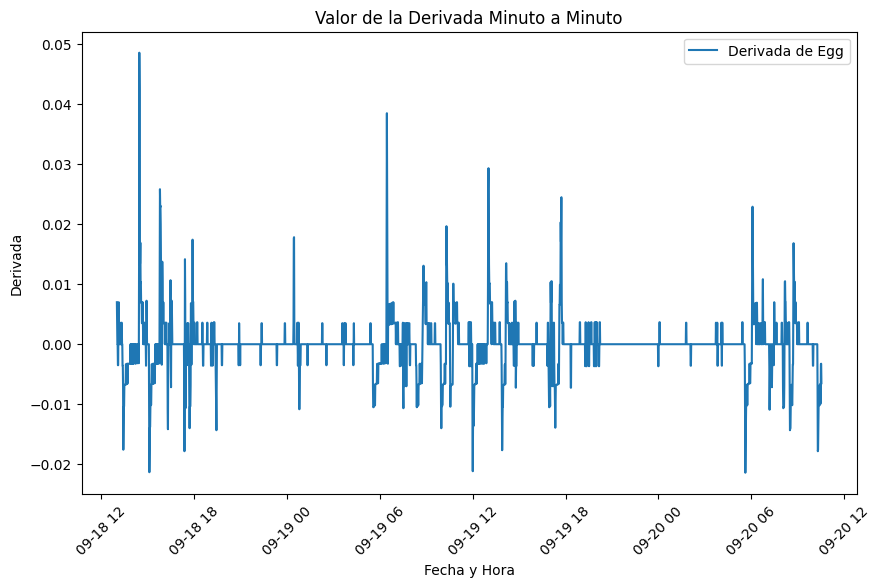

In [ ]:

'''
Para hacerle como ingeneria inversa hice que se vieran los valores punto a punto
 de la derivada con el fin de encontrar patrones, lo que persivo es que los off-bouts
o salidas del parental se aprecia una caida de la derivada por <= -0.01
'''



df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')
time_seconds = pd.to_numeric(df['Date-time']).values / 10**9

# Calcular la derivada minuto a minuto de 'Egg'
derivative = np.gradient(df['Egg'], time_seconds)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la derivada de 'Egg'
ax.plot(df['Date-time'], derivative, label='Derivada de Egg')

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Derivada')
ax.set_title('Valor de la Derivada Minuto a Minuto')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

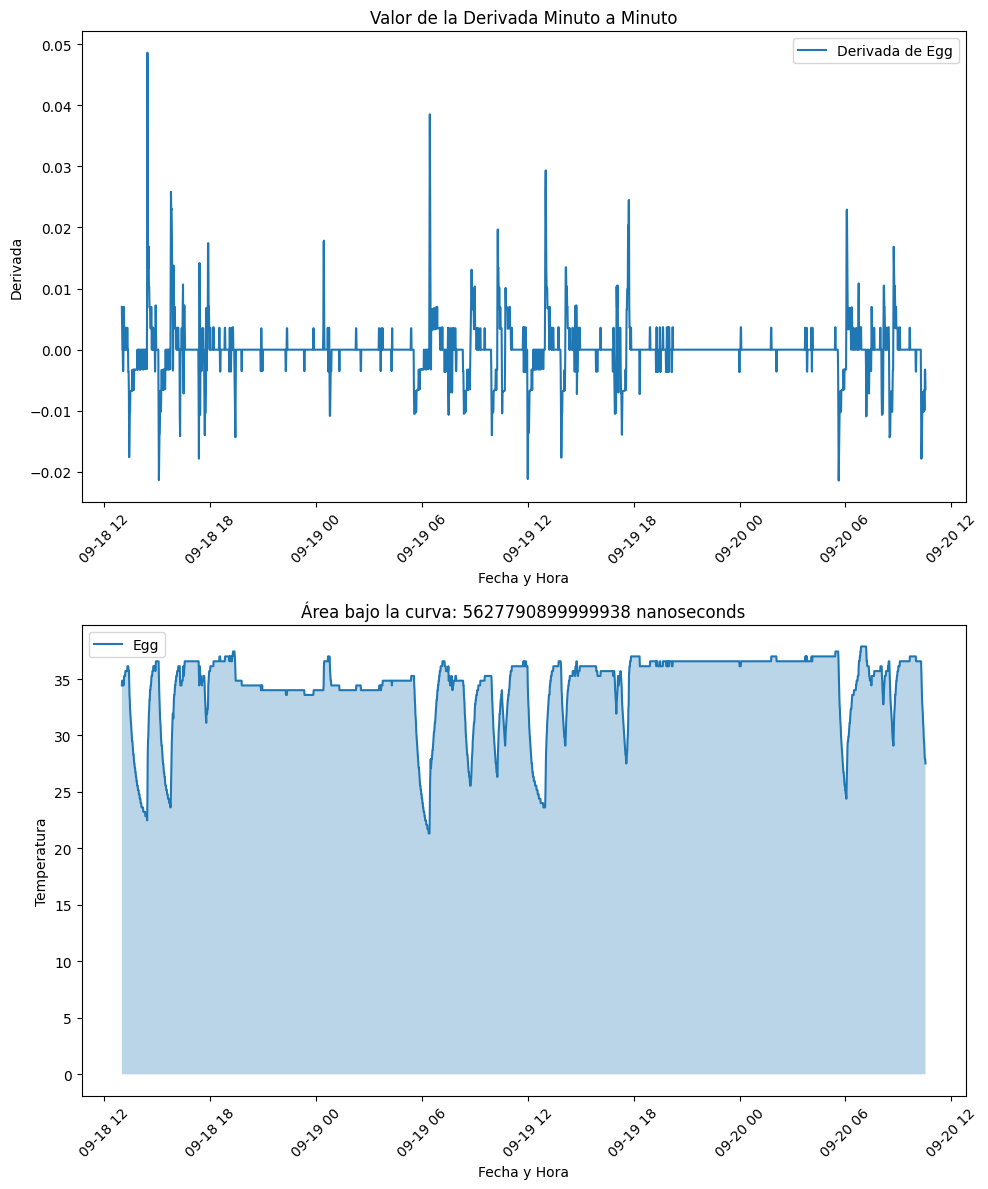

In [ ]:
'''
El patron de atras se ve mejor una versus la otra:
'''


df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')
time_seconds = pd.to_numeric(df['Date-time']).values / 10**9

# Calcular la derivada minuto a minuto de 'Egg'
derivative = np.gradient(df['Egg'], time_seconds)

# Configurar la figura y los ejes
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Graficar la derivada de 'Egg' - 1
axes[0].plot(df['Date-time'], derivative, label='Derivada de Egg')
axes[0].set_xlabel('Fecha y Hora')
axes[0].set_ylabel('Derivada')
axes[0].set_title('Valor de la Derivada Minuto a Minuto')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Graficar la serie de tiempo para 'Egg' - 2
axes[1].plot(df['Date-time'], df['Egg'], label='Egg')
axes[1].fill_between(df['Date-time'], df['Egg'], alpha=0.3)
axes[1].set_xlabel('Fecha y Hora')
axes[1].set_ylabel('Temperatura')
axes[1].set_title(f'Área bajo la curva: {area_under_curve}')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
####################################################################################################################################

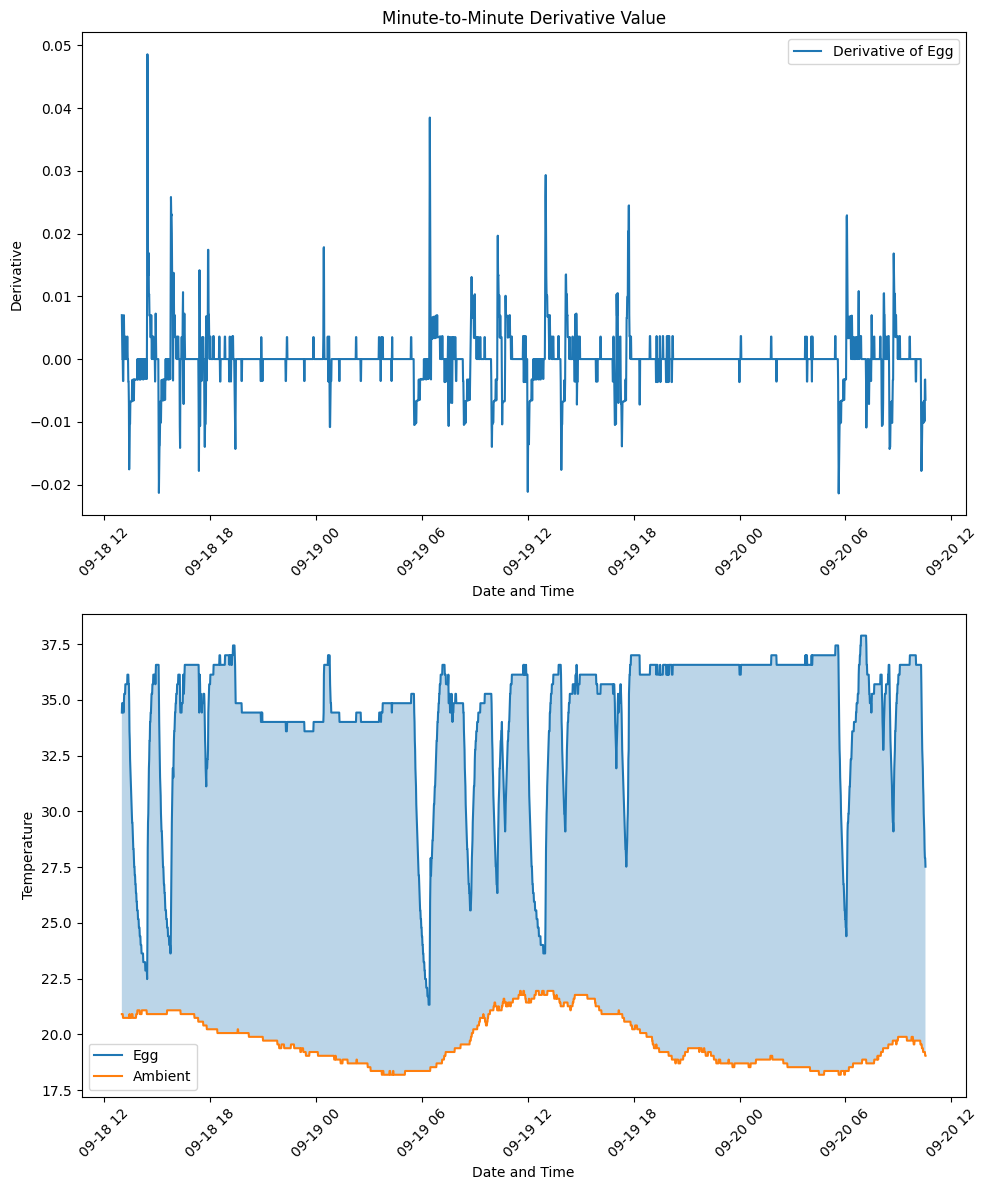

In [ ]:

'''
Ya si tenemos en cuenta la temperatura ambiental como base, nos daria de la siguiente manera:
'''

df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')
time_seconds = pd.to_numeric(df['Date-time']).values / 10**9

# derivative of the 'Egg'
derivative = np.gradient(df['Egg'], time_seconds)

# area under the curve of the 'Egg'
area_under_curve = np.trapz(df['Egg'], df['Date-time'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# P1
axes[0].plot(df['Date-time'], derivative, label='Derivative of Egg')
axes[0].set_xlabel('Date and Time')
axes[0].set_ylabel('Derivative')
axes[0].set_title('Minute-to-Minute Derivative Value')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# P2
axes[1].plot(df['Date-time'], df['Egg'], label='Egg')
axes[1].plot(df['Date-time'], df['Ambient'], label='Ambient')
axes[1].fill_between(df['Date-time'], df['Egg'], df['Ambient'], alpha=0.3)
axes[1].set_xlabel('Date and Time')
axes[1].set_ylabel('Temperature')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

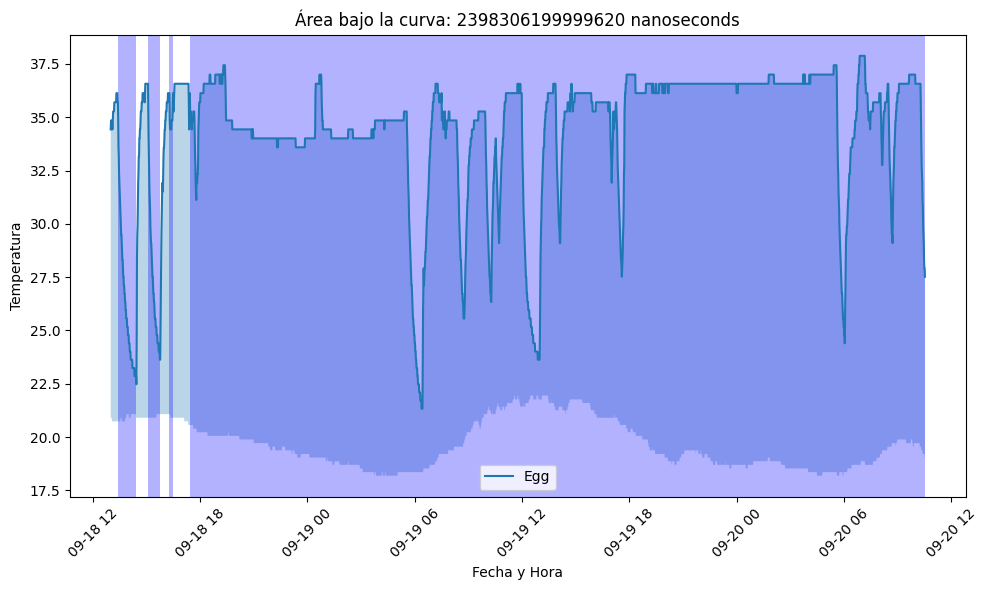

In [ ]:
'''
Ahora mi idea es poder reconocer los valores menores de -0.01 en derivada como el
punto de cambio o de inicio del off-bout, luego su aumento hasta un valor superior a
0.01 como la llegada del parental o on-bout.

trate de la siguiente manera:

'''

df['Date-time'] = pd.to_datetime(df['Date-time'], format='%m/%d/%Y %H:%M')

time_seconds = pd.to_numeric(df['Date-time']).values / 10**9
derivative = np.gradient(df['Egg'] - df['Ambient'], time_seconds)

off_bout_threshold = -0.01
on_bout_threshold = 0.01

off_bout_start = []
off_bout_end = []
on_bout_start = []
on_bout_end = []

is_off_bout = False
is_on_bout = False

for i in range(len(df)):
    if derivative[i] < off_bout_threshold:
        if not is_off_bout:
            off_bout_start.append(df['Date-time'][i])
            is_off_bout = True
    elif derivative[i] > on_bout_threshold:
        if is_off_bout and not is_on_bout:
            off_bout_end.append(df['Date-time'][i])
            is_off_bout = False
            is_on_bout = True
    elif derivative[i] <= 0 and is_on_bout:
        if not is_off_bout:
            on_bout_start.append(df['Date-time'][i])
            is_on_bout = False
    elif derivative[i] < off_bout_threshold and is_on_bout:
        if not is_off_bout:
            on_bout_end.append(df['Date-time'][i])
            is_on_bout = False
            is_off_bout = True

# Verificar si el último intervalo es un "off-bout"
if is_off_bout:
    off_bout_end.append(df['Date-time'].iloc[-1])

area_under_curve = np.trapz(df['Egg'] - df['Ambient'], df['Date-time'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date-time'], df['Egg'], label='Egg')
ax.fill_between(df['Date-time'], df['Egg'], df['Ambient'], alpha=0.3)

for start, end in zip(off_bout_start, off_bout_end):
    ax.axvspan(start, end, facecolor='blue', alpha=0.3)

for start, end in zip(on_bout_start, on_bout_end):
    ax.axvspan(start, end, facecolor='red', alpha=0.3)

ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Temperatura')
ax.set_title(f'Área bajo la curva: {area_under_curve}')
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()